<a href="https://colab.research.google.com/github/quant-IT/Clarusway/blob/main/Assignment_2_(PoliceKillingUS_Seaborn)_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH SEABORN

In [71]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [72]:
kill = pd.read_csv('/content/PoliceKillingsUS (1).csv', encoding="windows-1252")

In [73]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [74]:
kill.shape

(2535, 14)

In [75]:
kill.dropna(inplace=True)


In [76]:
kill.shape

(2254, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [77]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [78]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

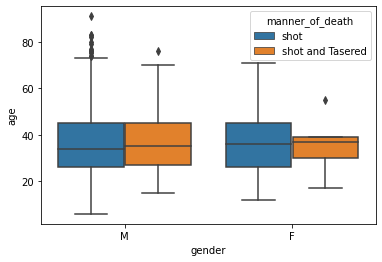

In [79]:
# with seaborn
sns.boxplot(data=kill, x="gender", y="age", hue="manner_of_death");

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

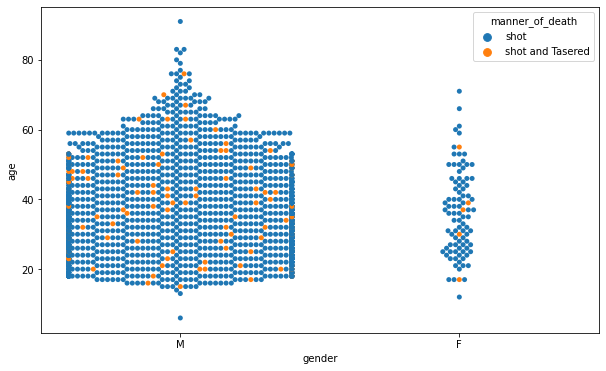

In [80]:
# with seaborn
plt.figure(figsize=(10,6))
sns.swarmplot(data=kill, x="gender", y="age", hue="manner_of_death");

## 2: Plot 12 most dangerous cities

In [81]:
kill.threat_level.unique()

array(['attack', 'other', 'undetermined'], dtype=object)

In [100]:

#kill[kill['city'] == "Houston"][['city', 'threat_level']].value_counts()


In [89]:
kill.city.sort_index(ascending=False).value_counts().head(12)

Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
Miami            15
San Antonio      15
Indianapolis     14
St. Louis        14
Oklahoma City    13
Name: city, dtype: int64

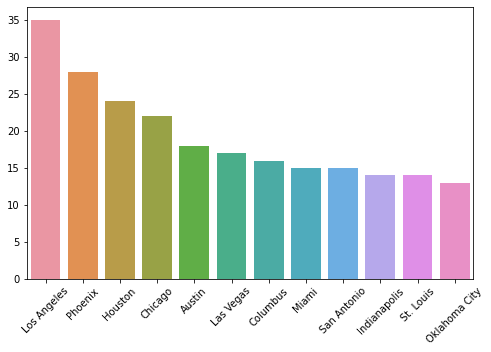

In [101]:
# with seaborn barplot
plt.figure(figsize=(8,5))
sns.barplot(x=kill.city.sort_index(ascending=False).value_counts().head(12).index,
            y=kill.city.sort_index(ascending=False).value_counts().head(12).values);
plt.xticks(rotation=45);


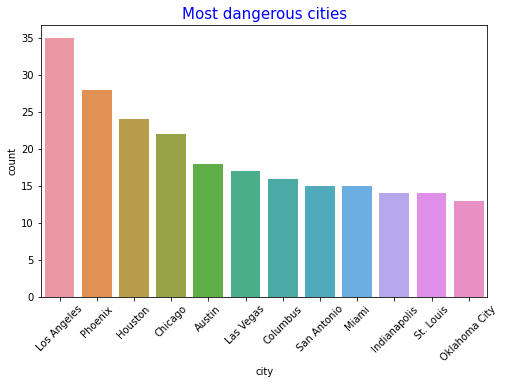

In [ ]:
# with seaborn countplot
plt.figure(figsize=(8,5))
sns.countplot(data=kill, x="city", order=kill.city.sort_index(ascending=False).value_counts().head(12).index);
plt.title("Most dangerous cities", size=15, color="blue")
plt.xticks(rotation=45);

## 3: Plot 20 most dangerous states

In [111]:
kill.state.sort_index(ascending=False).value_counts().iloc[:20]

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
IL     56
TN     56
WA     51
LA     47
PA     45
AL     45
VA     43
NY     43
WI     42
NM     41
Name: state, dtype: int64

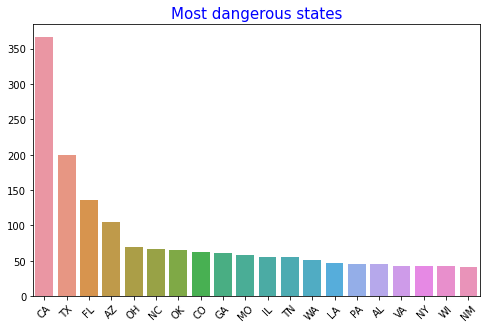

In [115]:
# with seaborn barplot
plt.figure(figsize=(8,5))
sns.barplot(x=kill.state.sort_index(ascending=False).value_counts().iloc[:20].index,
            y=kill.state.sort_index(ascending=False).value_counts().head(20).values);
plt.title("Most dangerous states", size=15, color="blue")
plt.xticks(rotation=45);

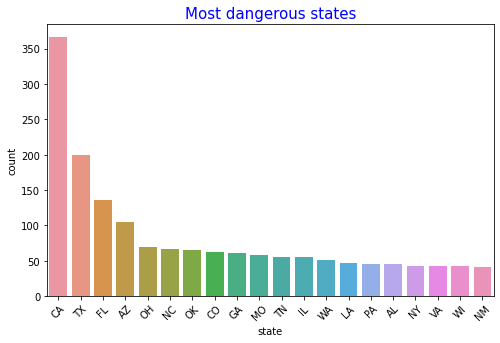

In [ ]:
# with seaborn countplot
plt.figure(figsize=(8,5))
sns.countplot(data=kill, x="state", order=kill.state.sort_index(ascending=False).value_counts().head(20).index);
plt.title("Most dangerous states", size=15, color="blue")
plt.xticks(rotation=45);

## 4: Plot Having mental ilness or not for killed people

In [118]:
kill.signs_of_mental_illness.value_counts()

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

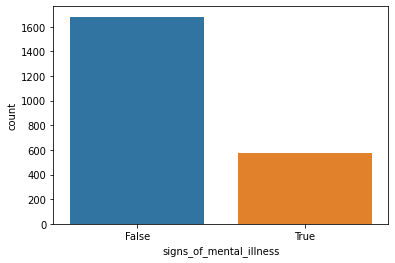

In [121]:
# with seaborn
sns.countplot(data=kill, x="signs_of_mental_illness");

## 5: Plot number of Threat Types

In [124]:
kill.threat_level.value_counts()

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

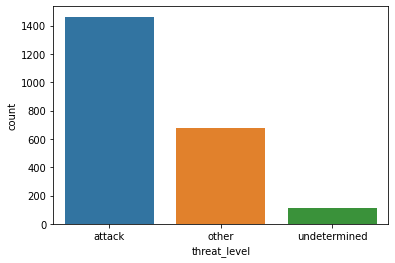

In [126]:
# with seaborn
sns.countplot(data=kill, x="threat_level");

## 6: Plot number of Flee Types

In [129]:
kill.flee.value_counts()

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

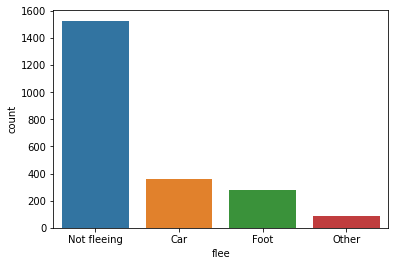

In [131]:
# with seaborn
sns.countplot(data=kill, x="flee");